# EMIT-ECOSTRESS CNN Model Training Demo Notebook
This notebook will walk you through how we use our CNN-based models for prediction of the number of standard deviations from the mean temperature that a given pixel is as measured by ECOSTRESS from the reflectance spectra of the other pixels in the frame as measured by EMIT.

To start, specify the absolute path to the project directory on your system where it says `project_path`. Then for the `base_data_path`, specify the relative path from the `project_path` that points to where the dataset is being stored on your system. The dataset should be organized as downloaded from the emit-ecostress Google Drive and as described in the `README` for this project. If this is the case, the `base_data_path` should not have to be changed.

In [1]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

import os
base_data_path = os.path.join('Data', 'Dataset')

## Specifying the Model
We have to make at least four choices when we set up each problem.
1. What type of input to we want to use? Potential options are "raw", "PCA", or "AE", which stands for AutoEncoder.
2. What dimension of that input do we want to use? Raw and PCA data can be anywhere from 0- to 244-dimensional, and autoencoder data can be downloaded from the team's Google Drive with dimensions 2, 3, 4, 5, 8, 16, 24, and 32, and you can train your own autoencoder to get additional dimensions as well.
3. What size of image do we want to consider? We specify this in both the x and y directions, and values can range from, in theory, 1 up to the size of the whole training or validation dataset, but we tend to use values from around 32 to 128. Whatever you choose, the values have to perfectly divide the x and y dimensions of the full dataset, which is 384x768 for training and 384x384 for validation, so you will likely have to use a power of 2 for each dimension.
4. What type of model do we want to use? Here, the potential options are "U-Net" and "SS", which stands for Semantic Segmenter.

There are several other optional choices, which include the batch sizes, the number of epochs to train for, the dropout rate of the neurons in the model, and the learning rate of the optimizer, but the default choices should work reasonably well in most circumstances.

Running using cuda

x_size=16, y_size=16, n_dimensions=32
UNet(
  (down1): Conv2d(33, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (up5): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxunpool5): MaxUnpool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  (up4): ConvTranspose2d(64, 32,

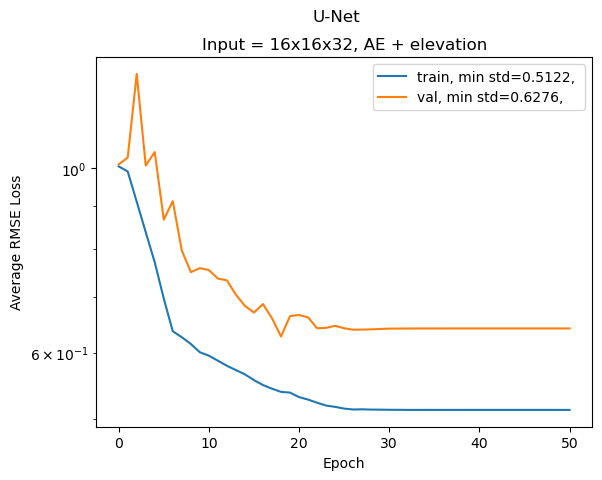

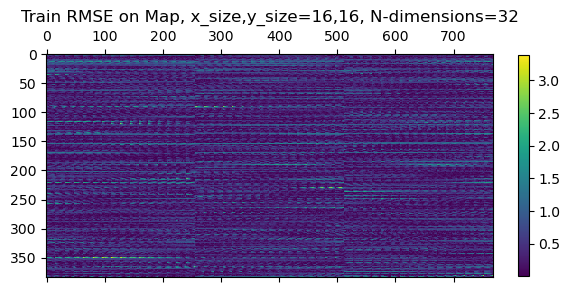

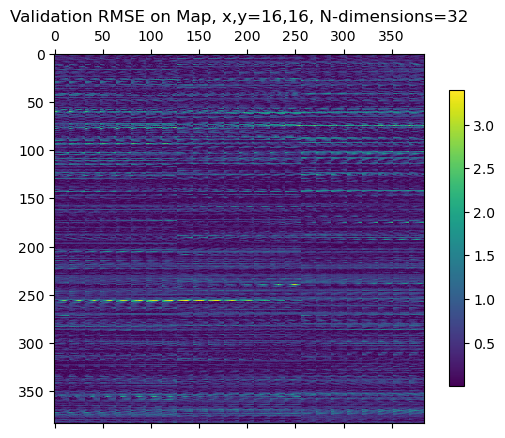

In [2]:
# specify these!
input_type = 'AE'
n_dimensions = 32
x_size = 16
y_size = 16
model_type = 'U-Net'

# optional parameters
settings = {
    'train_batch_size': 256,
    'val_batch_size': 1024,
    'n_epochs': 50,
    'dropout_rate': 0.0,
    'learning_rate': 0.001,
}

# this runs the training!
import sys
sys.path.append(os.path.join(project_path, 'EMIT-ECOSTRESS', 'modules'))
import utils.run_cnn
train_loss, val_loss, stats, train_loss_array, val_loss_array = (
    utils.run_cnn.train_cnn(
        project_path,
        base_data_path,
        input_type,
        n_dimensions,
        x_size,
        y_size,
        model_type,
        **settings,
    )
)

Now try different models and parameters and try to get below 0.5 validation RMSE!